<a href="https://colab.research.google.com/github/TsTarK85/Basic-AI-ML-Projects/blob/main/medical_cost_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Feature - sex, smoker, region

In [5]:
# Statistical measure of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Checking for null values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<ipython-input-7-0234f2ca2233>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


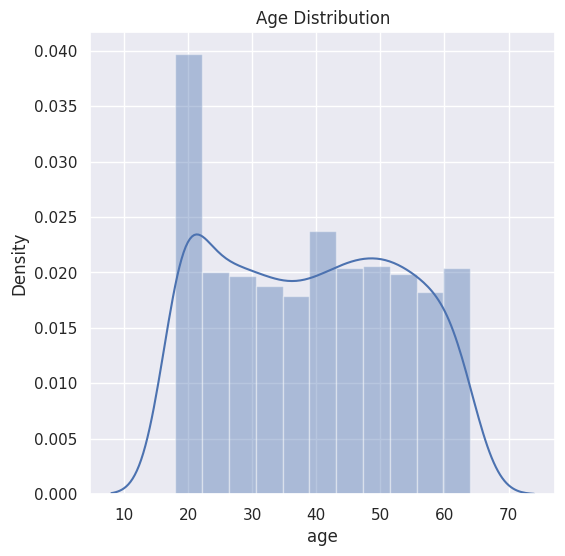

In [7]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

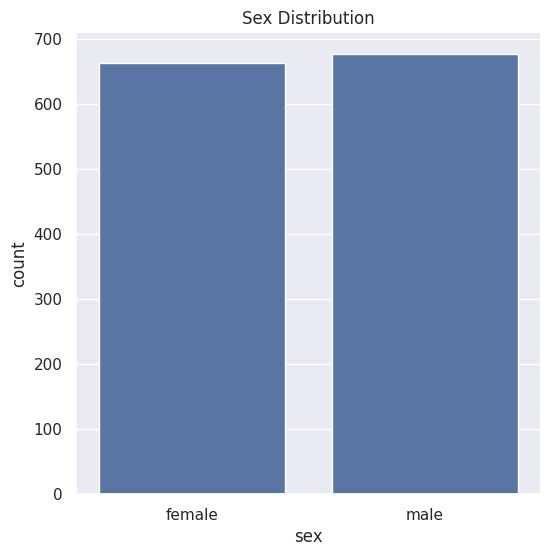

In [8]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = data)
plt.title('Sex Distribution')
plt.show()

# Alternate Way
# data['sex'].value_counts()

<ipython-input-9-dcf6bc3a5a8f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


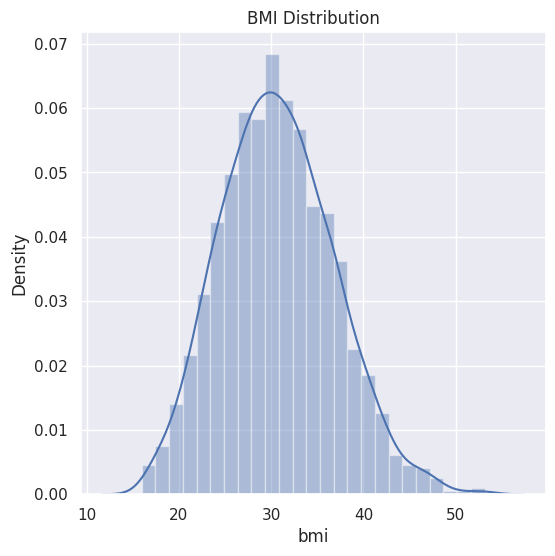

In [9]:
# BMI Distribution
plt.figure(figsize=(6, 6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

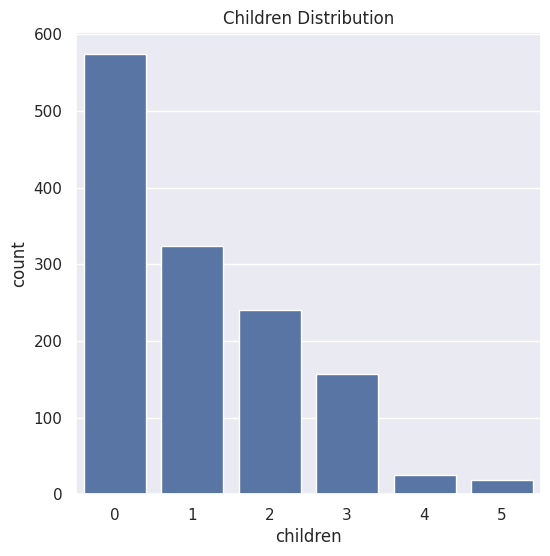

In [10]:
#  Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = data)
plt.title('Children Distribution')
plt.show()

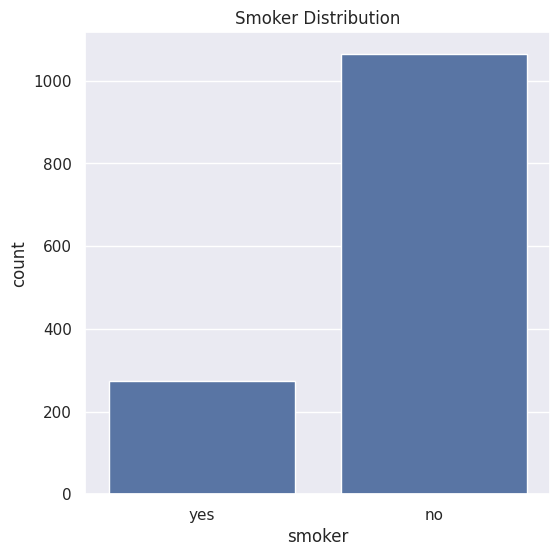

,count
smoker,
no,1064
yes,274


In [12]:
# For Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = data)
plt.title('Smoker Distribution')
plt.show()
data['smoker'].value_counts()

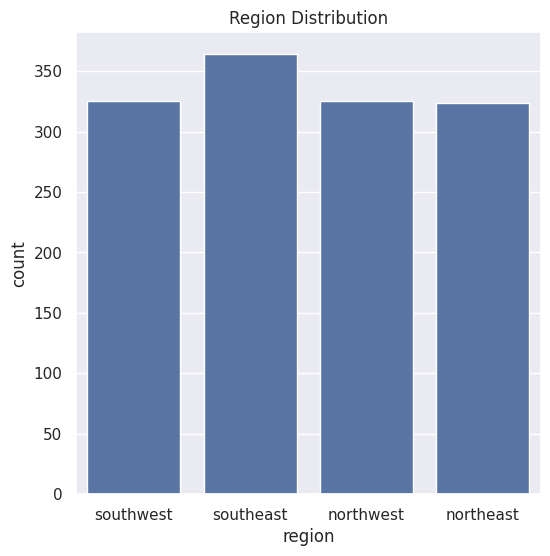

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [14]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = data)
plt.title('Region Distribution')
plt.show()

data['region'].value_counts()

<ipython-input-16-f5fe1cf03b6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


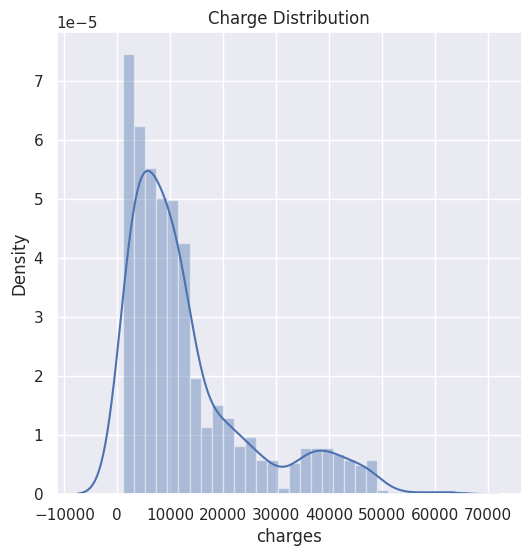

In [16]:
# Charge Column
plt.figure(figsize=(6, 6))
sns.distplot(data['charges'])
plt.title('Charge Distribution')
plt.show()

In [17]:
# Data Preprocessing
data.replace({'sex':{'male':0, 'female': 1}}, inplace=True)
data.replace({'smoker':{'no':0, 'yes': 1}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)

<ipython-input-17-dc1beb0ee200>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0, 'female': 1}}, inplace=True)
<ipython-input-17-dc1beb0ee200>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'no':0, 'yes': 1}}, inplace=True)
<ipython-input-17-dc1beb0ee200>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [19]:
x = data.drop(columns='charges', axis=1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Model Evaluation for test data
train_predict = model.predict(x_train)

# R Squared Value
r2_train = metrics.r2_score(y_train, train_predict)
print(r2_train)

0.7518195459072954


In [22]:
# Model Evaluation for test data
test_predict = model.predict(x_test)

# R Squared Value
r2_test = metrics.r2_score(y_test, test_predict)
print(r2_test)

0.7454471618659976


In [28]:
# Building predictive system
input = (31,1,25.74,0,0,0)
input_arr = np.asarray(input)
input_reshape = input_arr.reshape(1, -1)
prediction = model.predict(input_reshape)
print("The Predicted Cost is: ", prediction[0])

The Predicted Cost is:  3632.0204329083863


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
